In [275]:
# data analysis and wrangling
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
# visualization


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')


# Titanic Database Overview

**First see the link:**
- <h> https://www.kaggle.com/c/titanic/data </h>


### Question and problem definition

Competition sites like Kaggle define the problem to solve or questions to ask while providing the datasets for training your data science model and testing the model results against a test dataset. The question or problem definition for Titanic Survival competition is [described here at Kaggle](https://www.kaggle.com/c/titanic).

> Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.

We may also want to develop some early understanding about the domain of our problem. This is described on the [Kaggle competition description page here](https://www.kaggle.com/c/titanic). Here are the highlights to note.

- On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
- One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
- **Hypothesis**: Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.


# I. Acquire data

The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together.

In [190]:
train_df = pd.read_csv('.\\titanic\\train.csv')
test_df = pd.read_csv('.\\titanic\\test.csv')

## Analyze by describing data


**Which features are available in the dataset?**


In [191]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**Which features are categorical?**

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal? 

- Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.

**Which features are numerical?**

Which features are numerical? Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

- Continous: Age, Fare. Discrete: SibSp, Parch.

In [199]:
train_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**Which features are mixed data types?**

Numerical, alphanumeric data within same feature. 

- Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

**Which features may contain errors or typos?**

This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting.

- Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

In [19]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


891

In [208]:
train_df.isna().sum()/train_df.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [202]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Which features contain blank, null or empty values?**

These will require correcting.

- Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.
- Far > Cabin > Age are incomplete in case of test dataset.

**What are the data types for various features?**

Helping us during converting goal.

- Seven features are integer or floats. Six in case of test dataset.
- Five features are strings (object).

In [209]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

**What is the distribution of numerical feature values across the samples?**

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

- Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
- Survived is a categorical feature with 0 or 1 values.
- Around 38% samples survived representative of the actual survival rate at 32%.
- Most passengers (> 75%) did not travel with parents or children.
- Nearly 30% of the passengers had siblings and/or spouse aboard.
- Fares varied significantly with few passengers (<1%) paying as high as $512.
- Few elderly passengers (<1%) within age range 65-80.

In [217]:
train_df.describe(percentiles=[0.05,.1,.2,.3,0.4,0.5,0.6,0.7,0.8,0.9,0.98,0.99])
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
5%,45.500000,0.000000,1.000000,4.000000,0.000000,0.000000,7.225000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
20%,179.000000,0.000000,1.000000,19.000000,0.000000,0.000000,7.854200
30%,268.000000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
40%,357.000000,0.000000,2.000000,25.000000,0.000000,0.000000,10.500000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200


**What is the distribution of categorical features?**

- Names are unique across the dataset (count=unique=891)
- Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
- Cabin values have several duplicates  samples. Alternatively several passengers shared a cabin.
- Embarked takes three possible values. S port used by most passengers (top=S)
- Ticket feature has high ratio (22%) of duplicate values (unique=681).

In [219]:
train_df[train_df['Ticket']=='347082']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


In [31]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Moubarek, Master. Halim Gonios (""William George"")",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


## Let draw a big picture of our dataset

In [220]:
profile = ProfileReport(train_df, title='Titanic Profiling Report', html={'style':{'full_width':True}})

In [221]:
profile.to_widgets()

# II. Exploratory Data Analysis

### Assumptions based on data analysis

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

**Correlating.**: We want to know how well does each feature correlate with Survival. 

**Completing.**

1. We may want to complete Age feature as it is definitely correlated to survival.
2. We may want to complete the Embarked feature as it may also correlate with survival or another important feature.
3. We may want to complete the Cabin feature (is-it important ??)

**Correcting.**

1. Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival (maybe not ???).
2. Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset (maybe not ???).
3. PassengerId may be dropped from training dataset as it does not contribute to survival.
4. Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped (dropt ???)

**Creating.**

1. We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
2. We may want to engineer the Name feature to extract Title as a new feature.
3. We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
4. We may also want to create a Fare range feature if it helps our analysis.
5. We may want to creat a Cabin prefix ???
6. We may test any idea ...

**Classifying.**

We may also add to our assumptions based on the problem description noted earlier.

1. Women (Sex=female) were more likely to have survived.
2. Children (Age<?) were more likely to have survived. 
3. The upper-class passengers (Pclass=1) were more likely to have survived.

In [224]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [40]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [41]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [42]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Visualizing data


### Correlating numerical features with our solution goal (Survived).

A histogram chart is useful for analyzing continous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (Did infants have better survival rate?)

Note that x-axis in historgram visualizations represents the count of samples or passengers.

**Observations.**

- Infants (Age <=4) had high survival rate.
- Oldest passengers (Age = 80) survived.
- Large number of 15-25 year olds did not survived.
- Most passengers are in 15-35 age range.

**Decisions.**

This simple analysis confirms our assumptions as decisions for subsequent workflow stages.

- We should consider Age (our assumption classifying #2) in our model training.
- Complete the Age feature for null values (completing #1).
- We should band age groups (creating #3).

**FaceGrid**
- https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

In [228]:
train_df[train_df['Age']<1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


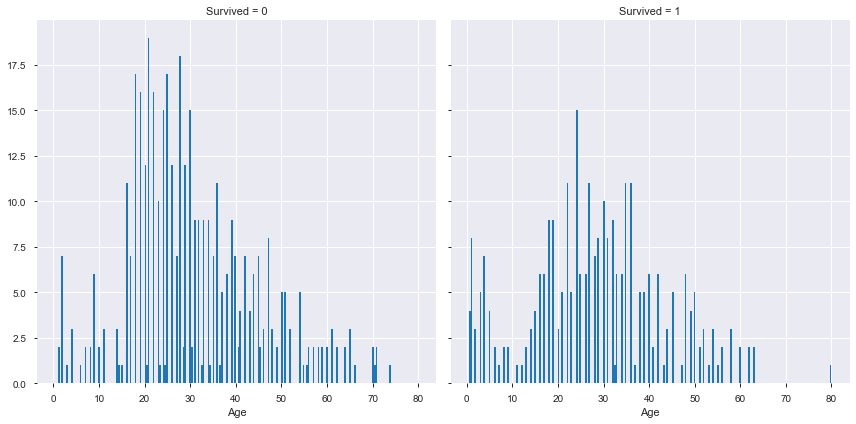

In [229]:
g = sns.FacetGrid(train_df, col='Survived',height=6)
g.map(plt.hist, 'Age', bins=200)

### Correlating numerical and ordinal features

We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

**Observations.**

- Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.
- Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.
- Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.
- Pclass varies in terms of Age distribution of passengers.

**Decisions.**

- Consider Pclass for model training.

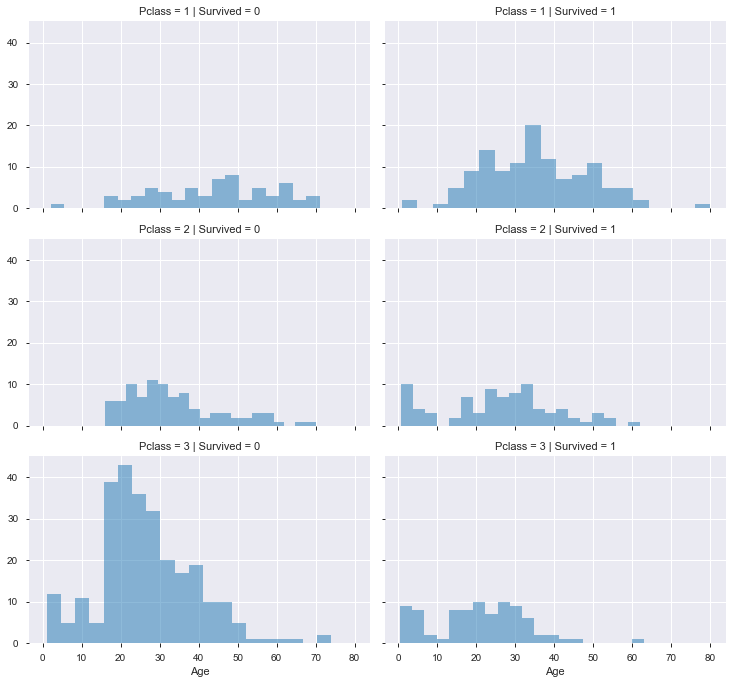

In [80]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=3.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

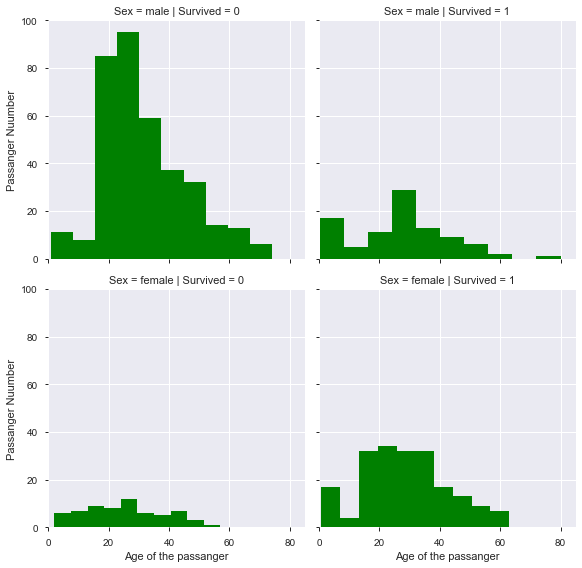

In [81]:
g = sns.FacetGrid(train_df, col='Survived',row='Sex',height=4,xlim=(0,85),ylim=(0,100))
g.map(plt.hist, 'Age', bins=10, color="g").set_axis_labels("Age of the passanger", "Passanger Nuumber")

### Correlating categorical features

Now we can correlate categorical features with our solution goal.

**Observations.**

- Female passengers had much better survival rate than males. Confirms classifying (#1).
- Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
- Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).
- Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).

**Decisions.**

- Add Sex feature to model training.
- Complete and add Embarked feature to model training.

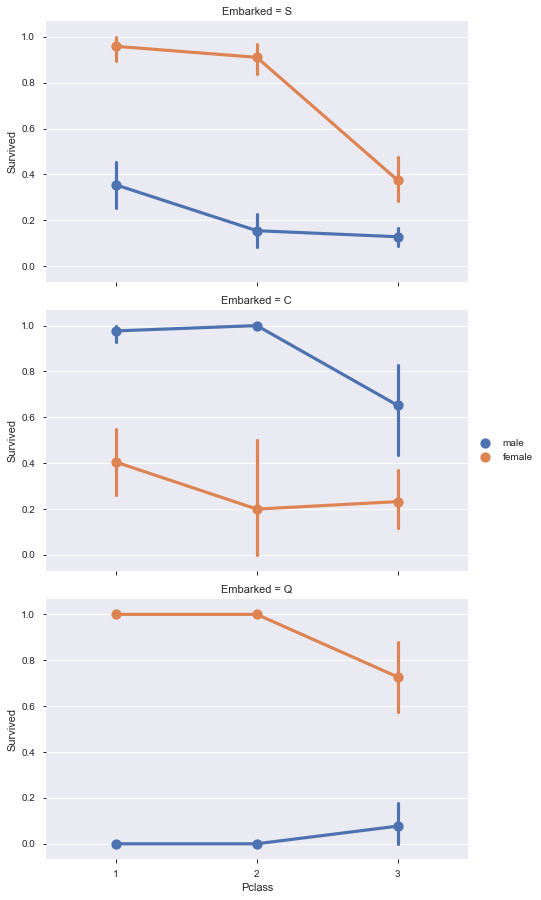

In [98]:
grid = sns.FacetGrid(train_df, row='Embarked', height=4.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep',)
grid.add_legend()

### Correlating categorical and numerical features

We may also want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric).

**Observations.**

- Higher fare paying passengers had better survival. Confirms our assumption for creating (#4) fare ranges.
- Port of embarkation correlates with survival rates. Confirms correlating (#1) and completing (#2).

**Decisions.**

- Consider banding Fare feature.

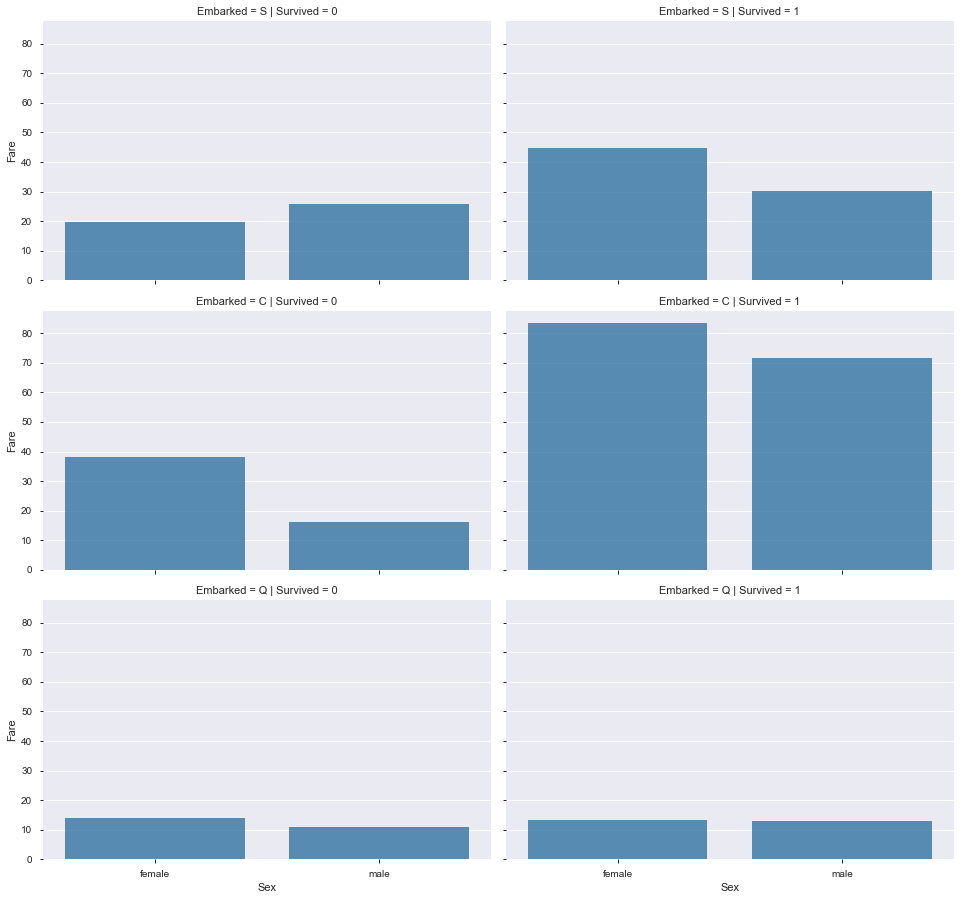

In [102]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=4.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.8, ci=None)
grid.add_legend()

In [103]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [106]:
train_df.corr().style.background_gradient(cmap='Reds')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# III. Let's build our first model

## One attribute model

In [277]:
X = train_df[['Fare']].copy()
y = train_df['Survived'].copy() # or df.Survived.values
y.count() #so we need no preprocessing

891

In [289]:
#First Step
model1 = DecisionTreeClassifier()
#Second step
model1.fit(X,y)
#Prediction
p = model1.predict(X)
#Compute the accuracy of our model
print(round(np.sum(y==p)/len(y)*100,2),"%")

80.36 %


In [292]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y,p)*100,2),"%")

80.36 %


The previous example is not realistic as there is no outcome 

In [294]:
train_set = train_df[0:700].copy()
test_set = train_df[700:].copy()

print(train_set.shape,test_set.shape)

X_train = train_set[['Fare']]
y_train = train_set['Survived']

X_test = test_set[['Fare']]
y_test = test_set['Survived'] 

#First Step
dt_model = DecisionTreeClassifier()
#Second step
dt_model.fit(X_train,y_train)

#Prediction
pred_train = dt_model.predict(X_train)
pred_test = dt_model.predict(X_test)

#Prediction sur les données du train (de l'apprentisssage)
1 - np.sum(pred_train==y_train)/len(y_train)

#Prediction sur les données du test (de l'apprentisssage)
1 - np.sum(pred_test==y_test)/len(y_test)

print('Train Score (error) :',1-accuracy_score(y_train,pred_train),"or: ", 1-dt_model.score(X_train,y_train))
print('Test Score (error) :',1-accuracy_score(y_test,pred_test),"or: ", 1-dt_model.score(X_test,y_test))



(700, 12) (191, 12)
Train Score (error) : 0.19428571428571428 or:  0.19428571428571428
Test Score (error) : 0.2722513089005235 or:  0.2722513089005235


So, our model is very bad!!!

## Cross Validation

In [295]:
from sklearn.model_selection import KFold, StratifiedKFold

data =  np.array( [[1,2,3,4,5],[8,5,2,1,5],[1,0,0,1,0]] ).transpose()
example_df =  pd.DataFrame(data, columns=['x1','x2','target'])
example_df.shape
example_df.head(10)

,x1,x2,target
0,1,8,1
1,2,5,0
2,3,2,0
3,4,1,1
4,5,5,0


In [125]:
example_df.describe()

,x1,x2,target
count,5.000000,5.000000,5.000000
mean,3.000000,4.200000,0.400000
std,1.581139,2.774887,0.547723
min,1.000000,1.000000,0.000000
25%,2.000000,2.000000,0.000000
50%,3.000000,5.000000,0.000000
75%,4.000000,5.000000,1.000000
max,5.000000,8.000000,1.000000


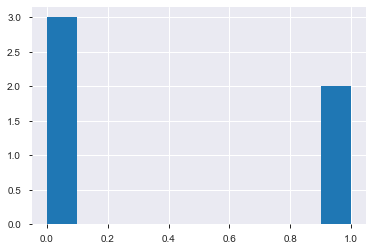

In [126]:
example_df.target.hist()

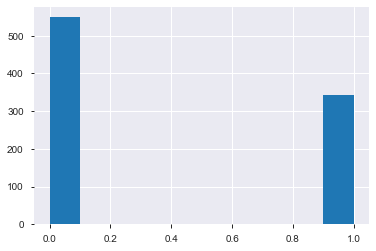

In [127]:
train_df.Survived.hist()

In [128]:
cv =  StratifiedKFold(n_splits=2,random_state=0,shuffle=True)

In [296]:
example_df.head(10)

,x1,x2,target
0,1,8,1
1,2,5,0
2,3,2,0
3,4,1,1
4,5,5,0


In [133]:
y = example_df.target.values
X = example_df[['x1','x2']]
for train_index, test_index in cv.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [0 1] TEST: [2 3 4]
TRAIN: [2 3 4] TEST: [0 1]


In [134]:
example_df.loc[train_index]

,x1,x2,target
2,3,2,0
3,4,1,1
4,5,5,0


### Titanic problem

Assume that we add the Age attribute:
- The problem how to fill empty records of Age
- Solutions : 
    1. Remove rows whre ange = NAN : if enough data less then 5%, otherwise we will lose information
    2. Replace with zeor or mean : if normal distribution is then mean by sexe
    3. Find some records and replace with age value  from these records. 
    4. The best solution for decision tree: replace with a value does't exist like -1, -9, -99, -999

In [243]:
df = pd.read_csv('.\\titanic\\train.csv')
X = df[['Fare','SibSp','Parch','Age']]
y = df['Survived']

# Preprocessing
X['Age'].fillna(-99,inplace=True)

#Cross-validation
cv = StratifiedKFold(n_splits=2,random_state=90,shuffle=True)

#Train 
for train_index, test_index in cv.split(X, y):
    X_train = X.loc[train_index]
    y_train = y[train_index]
    
    X_test = X.loc[test_index]
    y_test = y[test_index]
    
    
    model = DecisionTreeClassifier()
    model.fit(X_train,y_train)
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    score = 1 - accuracy_score(y_train,pred_train)
    print("TRAIN error:", score)
    
    
    score = 1 - accuracy_score(y_test,pred_test)
    print("Test error:", score)
    
    print ('Fold','*'*50)

TRAIN error: 0.038202247191011285
Test error: 0.3228699551569507
Fold **************************************************
TRAIN error: 0.024663677130044803
Test error: 0.34606741573033706
Fold **************************************************


Conclusion: when adding Age to the train, the accurancy is augmenting but not in the test : overfiting. 
The problem can be: 
    1. The model is too complex so we can change the depth or 
    2. is not an important features

Now, we add the Sex attribute: we have a catagorical feature but DT does't accept categorial

In [297]:
from sklearn.preprocessing import OrdinalEncoder

df = pd.read_csv('.\\titanic\\train.csv')
X = df[['Fare','SibSp','Parch','Sex']]
y = df['Survived']

# Preprocessing

'''
first solution for replacing catagorical value
X.loc[ X['Sex']=='male', 'Sex' ] = 0
X.loc[ X['Sex']=='female', 'Sex'] = 1

'''

lb = OrdinalEncoder()
X['Sex'] = lb.fit_transform(X[['Sex']]).astype(int)




#Cross-validation
cv = StratifiedKFold(n_splits=5,random_state=90,shuffle=True)

results_df = pd.DataFrame(data=np.zeros((5,2)),columns=['Train_error', 'Test_error'])
fold=0

#Train 
for train_index, test_index in cv.split(X, y):
    X_train = X.loc[train_index]
    y_train = y[train_index]
    
    X_test = X.loc[test_index]
    y_test = y[test_index]
    
    
    model = DecisionTreeClassifier()
    model.fit(X_train,y_train)
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    score = 1 - accuracy_score(y_train,pred_train)
    print("TRAIN:", score)

    results_df.loc[fold,'Train_error'] = round(score*100,2)
    
    score = 1 - accuracy_score(y_test,pred_test)
    print("Test:", score)
    
    results_df.loc[fold,'Test_error'] = round(score*100,2)
    
    print ('Fold','*'*50)
    fold +=1
    

TRAIN: 0.0786516853932584
Test: 0.16759776536312854
Fold **************************************************
TRAIN: 0.06872370266479666
Test: 0.2191011235955056
Fold **************************************************
TRAIN: 0.06872370266479666
Test: 0.2191011235955056
Fold **************************************************
TRAIN: 0.07713884992987374
Test: 0.2415730337078652
Fold **************************************************
TRAIN: 0.07713884992987374
Test: 0.1966292134831461
Fold **************************************************


Please read: 
    - https://scikit-learn.org/stable/modules/learning_curve.html

In [300]:
results_df.describe()

,Train_error,Test_error
count,5.00000,5.000000
mean,7.40600,20.880000
std,0.49364,2.799241
min,6.87000,16.760000
25%,6.87000,19.660000
50%,7.71000,21.910000
75%,7.71000,21.910000
max,7.87000,24.160000


In [301]:
sub = test_df[['Fare','SibSp','Parch','Sex']]
lb = OrdinalEncoder()
sub['Sex'] = lb.fit_transform(sub[['Sex']]).astype(int)

sub['Fare'].fillna(sub['Fare'].mean(), inplace=True)

cv = StratifiedKFold(n_splits=5,random_state=10,shuffle=True)

results_df = pd.DataFrame()
fold=0

for train_index, test_index in cv.split(X, y):
    X_train = X.loc[train_index]
    y_train = y[train_index]

    X_test = X.loc[test_index]
    y_test = y[test_index]

    model = DecisionTreeClassifier(max_depth=7, min_samples_leaf=2)
    model.fit( X_train,  y_train)

    pred_sub   = model.predict_proba(sub)[:,1]
   
    results_df['fold_'+str(fold)] = pred_sub
    
    fold +=1

In [302]:
results_df

,fold_0,fold_1,fold_2,fold_3,fold_4
0,0.166667,0.111111,0.147059,0.000000,0.171429
1,0.769231,0.722222,0.214286,0.500000,1.000000
2,0.115385,0.132075,0.134615,0.113636,0.077922
3,0.115385,0.132075,0.134615,0.113636,0.077922
4,0.956522,1.000000,0.214286,0.884615,0.680851
...,...,...,...,...,...
413,0.115385,0.132075,0.134615,0.236842,0.077922
414,1.000000,1.000000,1.000000,1.000000,1.000000
415,0.087912,0.066667,0.000000,0.068966,0.000000
416,0.115385,0.132075,0.134615,0.236842,0.077922


In [303]:
#Mean strategy
preds = (results_df.mean(axis=1) >=0.5).astype(int)

In [304]:
#Majority voting strategy
preds = (results_df.mean(axis=1) >=0.5).astype(int)

In [310]:
my_final_sub = pd.read_csv('.\\titanic\\test.csv')[['PassengerId']]
my_final_sub['Survived'] = preds

my_final_sub.to_csv('submission.csv', index=False)

In [309]:
my_final_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## GridSearch

In [173]:
from sklearn.model_selection import GridSearchCV

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

clf = DecisionTreeClassifier()

parameters_dc = { 'max_depth' : range(1,20),
                  'min_samples_leaf': range(2,20)}

gs = GridSearchCV(estimator=clf, param_grid=parameters_dc, cv=cv )
gs.fit(X , y  )
print ( gs.best_params_ )
print ("ERROR : ", 1-gs.best_score_)

{'max_depth': 7, 'min_samples_leaf': 2}
ERROR :  0.1964283472475048


In [179]:
clf.score

<bound method ClassifierMixin.score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')>

In [276]:
clf = DecisionTreeClassifier(max_depth=7, min_samples_leaf=2)

clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Regression Logistic and KNN, RandomForest

#Preprocessing : with mean
df['Age'].fillna(df['Age'].mean(),inplace=True)
tf['Age'].fillna(df['Age'].mean(),inplace=True)

df['Embarked'].fillna('X',inplace=True)
tf['Embarked'].fillna('X',inplace=True)

df['Cabin'].fillna('XX',inplace=True)
tf['Cabin'].fillna('XX',inplace=True)

# Feature Selection
X = df[['Fare','SibSp','Parch','Sex', 'Age']].copy()
y = df['Survived'].values

# Preprocessing : here label encoding is sufficient as we have only two class
categories1 = ['Sex']

for cat in categories1:
    lb = LabelEncoder()
    lb.fit(X[cat])
    X[cat] = lb.transform(X[cat])

#One Hot encoding
#categories2 = ['Embarked']
#pd.get_dummies(X, columns=categories2)



#Cross-validation
sk = StratifiedKFold(n_splits=5,random_state=90,shuffle=True)


# Preprcessing
scl = MinMaxScaler()
X_scaled_minmax = scl.fit_transform(X)

scl = StandardScaler()
X_scaled_std = scl.fit_transform(X)

#model
LG_clf = LogisticRegression()
KNN_clf = KNeighborsClassifier()
RF_clf = RandomForestClassifier(n_estimators=20)
Ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20,min_samples_split=17),n_estimators=20)

#LG and KNN parameters
LG_parameters = {'C':[0.01,.1,1,2,5]}
KNN_parameters = {'n_neighbors':[1,2,5,10,20,30], 'p':[1,2],'weights':['uniform','distance']}
RF_parameters = {'max_depth':range(1,20), 'min_samples_split':range(2,20)}
ADA_parameters = {'learning_rate':[0.01,0.05,0.1,0.5,1]}


#Search for best parameters.
gs_LG = GridSearchCV(LG_clf, param_grid=LG_parameters, cv=sk)
gs_KNN = GridSearchCV(KNN_clf, param_grid=KNN_parameters, cv=sk)
gs_RF = GridSearchCV(RF_clf, param_grid=RF_parameters, cv=sk)
gs_ADA = GridSearchCV(ADA_clf, param_grid=ADA_parameters, cv=sk)

#Train
gs_LG.fit(X_scaled_minmax,y)
gs_KNN.fit(X_scaled_minmax,y)
gs_RF.fit(X_scaled_minmax,y)
